In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [17]:
data = pd.read_csv("Dataset_II.csv")

In [18]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [19]:
#ids are not useful. so drop column 1
data.drop(data.columns[0], inplace=True, axis=1)

In [20]:
data.isnull().sum()
data.isna().sum()
#2 columns contain missing values

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [21]:
#taking the numeric values
cols = ["Age","Credit amount", "Duration"]
data = data.loc[:,cols]

In [22]:
data=np.log(data)

In [25]:
from sklearn.cluster import DBSCAN 
db = DBSCAN(eps=0.2,min_samples=15, metric='euclidean') 
y_db = db.fit_predict(data)


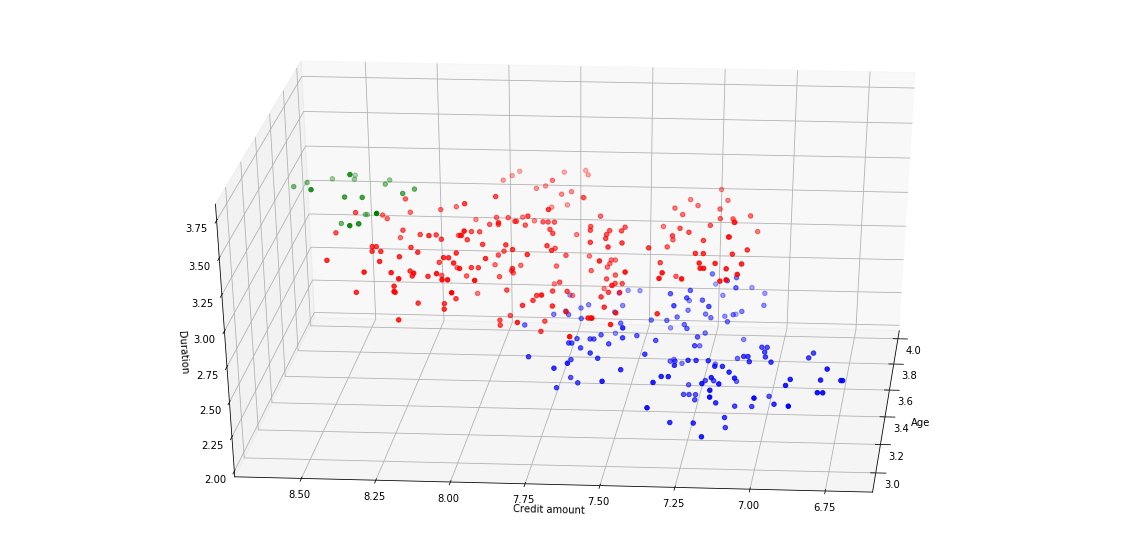

In [26]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,10))
data['label']=y_db
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data["Age"][data.label == 0], data["Credit amount"][data.label == 0], data["Duration"][data.label == 0], c='blue')
ax.scatter(data["Age"][data.label == 1], data["Credit amount"][data.label == 1], data["Duration"][data.label == 1], c='red')
ax.scatter(data["Age"][data.label == 2], data["Credit amount"][data.label == 2], data["Duration"][data.label == 2], c='green')


ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Credit amount")
ax.set_zlabel('Duration')
plt.show()